In [1]:
# Including Libraries
# necessary imports
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
import itertools
import numpy as np
import seaborn as sb
import pickle

In [2]:
#We will import the file through the pandas 
TrueNews = pd.read_csv("True.csv")
FakeNews = pd.read_csv("Fake.csv")
#Let's check our data
print(TrueNews.head(5))
#print(FakeNews.head(5))

                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   


In [3]:
#Checking shape for both files
print(TrueNews.shape)
print(FakeNews.shape)

(21417, 4)
(23481, 4)


In [4]:
print('FAKE',FakeNews.isnull().sum())
print('TRUE',TrueNews.isnull().sum())

FAKE title      0
text       0
subject    0
date       0
dtype: int64
TRUE title      0
text       0
subject    0
date       0
dtype: int64


In [5]:
#Columns Print
print(list(TrueNews.columns))
print(list(FakeNews.columns))

['title', 'text', 'subject', 'date']
['title', 'text', 'subject', 'date']


In [6]:
#We are adding label fake and true
TrueNews['label'] = 'True'
TrueNews.head(5)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


In [7]:
FakeNews['label'] = 'Fake'
FakeNews.head(5)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


In [8]:
TrueNews.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


In [9]:
#Let's concatenate the dataframes
frames = [TrueNews, FakeNews]
news_dataset = pd.concat(frames)
news_dataset

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",Fake
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",Fake
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",Fake
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",Fake


In [10]:
#New combined dataset 
news_dataset.describe()

,title,text,subject,date,label
count,44898,44898,44898,44898,44898
unique,38729,38646,8,2397,2
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 20, 2017",Fake
freq,14,627,11272,182,23481


In [11]:
news_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  object
dtypes: object(5)
memory usage: 2.1+ MB


In [12]:
final_data = news_dataset.dropna()

In [13]:
final_data.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [14]:
# Removing the date 
final_data.drop(["date"],axis=1,inplace=True)
final_data.head()

,title,text,subject,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,True


In [15]:
# Removing the title
final_data.drop(["title"],axis=1,inplace=True)
final_data.head()

,text,subject,label
0,WASHINGTON (Reuters) - The head of a conservat...,politicsNews,True
1,WASHINGTON (Reuters) - Transgender people will...,politicsNews,True
2,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,True
3,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,True
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,True


In [16]:
#First lets convert our data into lower case 
final_data['text'] = final_data['text'].apply(lambda x: x.lower())
#final_data['title'] = final_data['title'].apply(lambda x: x.lower())
final_data.head()

,text,subject,label
0,washington (reuters) - the head of a conservat...,politicsNews,True
1,washington (reuters) - transgender people will...,politicsNews,True
2,washington (reuters) - the special counsel inv...,politicsNews,True
3,washington (reuters) - trump campaign adviser ...,politicsNews,True
4,seattle/washington (reuters) - president donal...,politicsNews,True


In [17]:
#Removing punctuation
import string

def remove_punctuation(text):
    #all_list = [char for char in text if char not in string.punctuation]
    #no_punct = ''.join(all_list)
    translator = str.maketrans('', '',string.punctuation)
    no_punct = text.translate(translator)
    return no_punct

final_data['text'] = final_data['text'].apply(remove_punctuation)

In [18]:
# Verifying
final_data.head()

,text,subject,label
0,washington reuters the head of a conservative...,politicsNews,True
1,washington reuters transgender people will be...,politicsNews,True
2,washington reuters the special counsel invest...,politicsNews,True
3,washington reuters trump campaign adviser geo...,politicsNews,True
4,seattlewashington reuters president donald tr...,politicsNews,True


In [19]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

final_data['text'] = final_data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
final_data.head()

,text,subject,label
0,washington reuters head conservative republica...,politicsNews,True
1,washington reuters transgender people allowed ...,politicsNews,True
2,washington reuters special counsel investigati...,politicsNews,True
3,washington reuters trump campaign adviser geor...,politicsNews,True
4,seattlewashington reuters president donald tru...,politicsNews,True


In [21]:
final_data = final_data.sample(frac = 1)

In [22]:
final_data.head()

,text,subject,label
10054,reuters us department labor plans announce wed...,politicsNews,True
19027,new delhi reuters us defense secretary jim mat...,worldnews,True
17731,paris reuters france wednesday reiterated call...,worldnews,True
5717,go back africa phrase one would expect hear so...,News,Fake
22434,21st century wire says mainstream media gone g...,US_News,Fake


subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


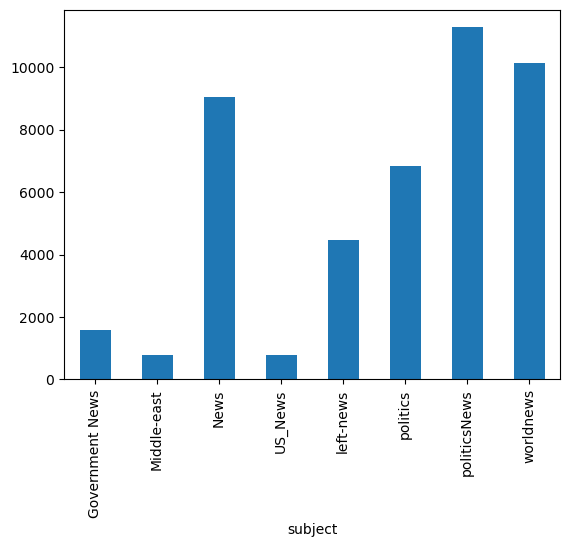

In [23]:
# How many articles per subject?
import matplotlib.pyplot as plt
print(final_data.groupby(['subject'])['text'].count())
final_data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

label
Fake    23481
True    21417
Name: text, dtype: int64


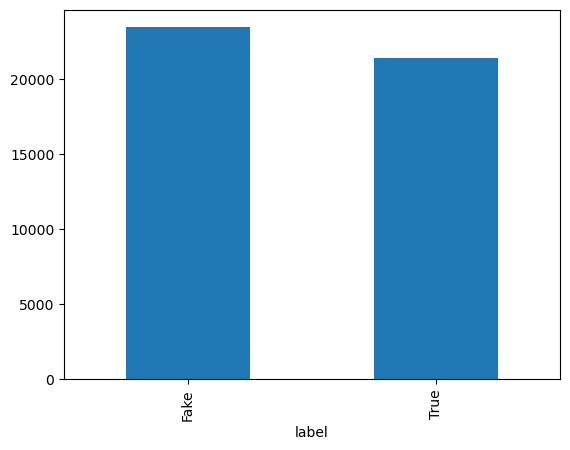

In [24]:
# How many fake and true articles?
print(final_data.groupby(['label'])['text'].count())
final_data.groupby(['label'])['text'].count().plot(kind="bar")
plt.show()


In [25]:
!pip install wordcloud

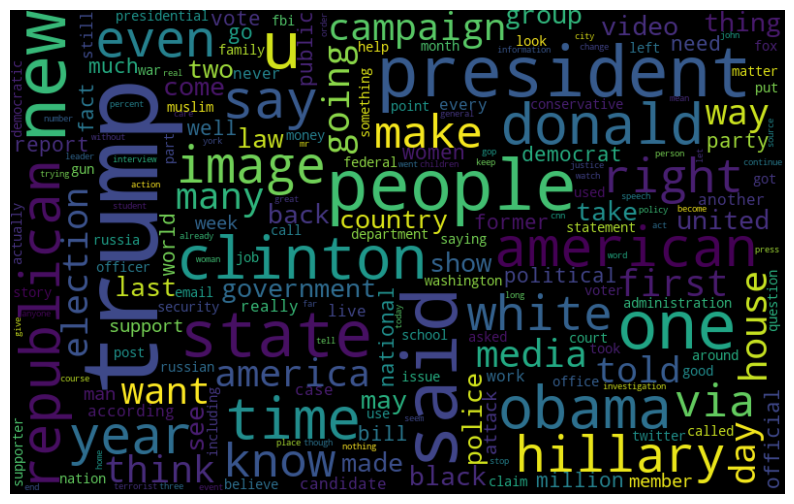

In [26]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = final_data[final_data["label"] == "Fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

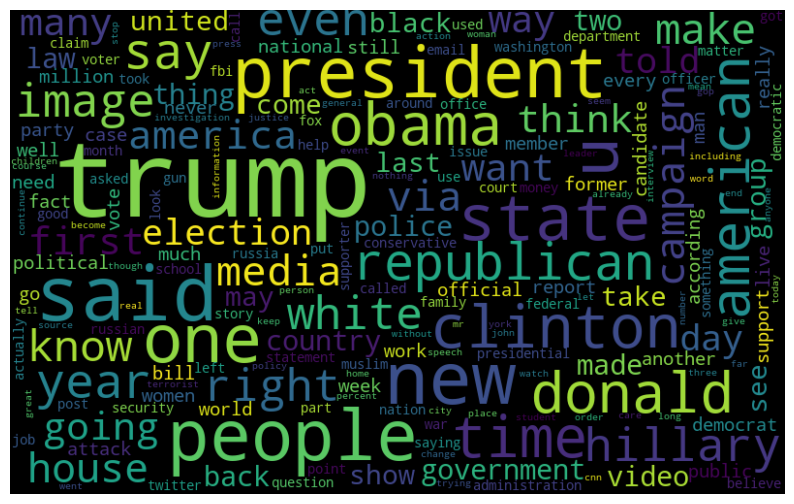

In [27]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = final_data[final_data["label"] == "True"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [28]:
# Most frequent words counter  
import seaborn as sns  
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'orange')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

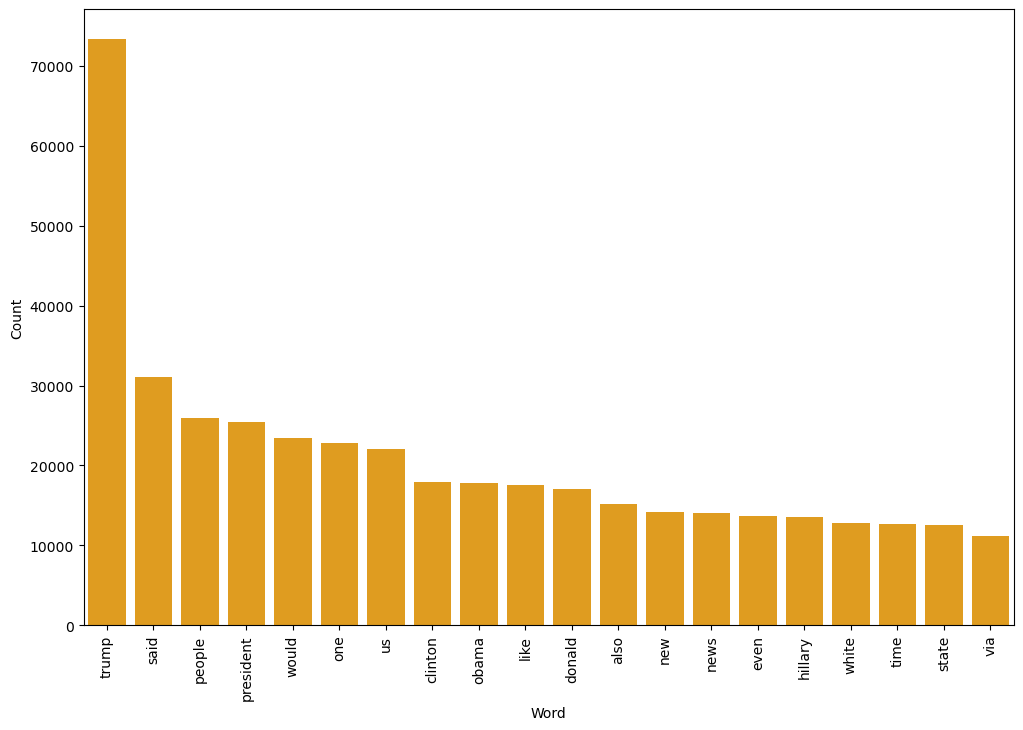

In [29]:
# Most frequent words in fake news
counter(final_data[final_data["label"] == "Fake"], "text", 20)

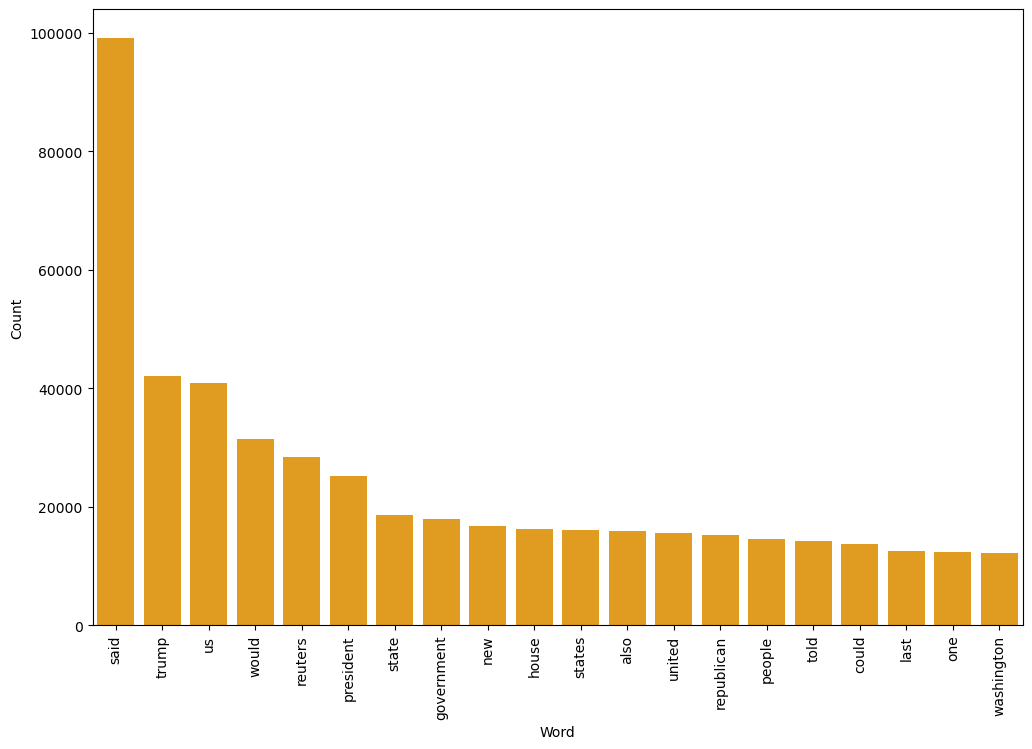

In [30]:
# Most frequent words in true news
counter(final_data[final_data["label"] == "True"], "text", 20)

In [31]:
# Function to plot the confusion matrix 
# This function prints and plots the confusion matrix
# Normalization can be applied by setting 'normalize=True'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [32]:
x = final_data['text']
y = final_data['label']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [34]:
# Transform the training data into bag of words features using the CountVectorizer
count_vectorizer = CountVectorizer()
x_train_bow = count_vectorizer.fit_transform(x_train)

In [35]:
# Transform the test data into bag of words features using the CountVectorizer
x_test_bow = count_vectorizer.transform(x_test)

In [36]:
# Get the feature names of 'count_vectorizer'

print(count_vectorizer.get_feature_names()[:10])

['00', '000', '0000', '000000017', '000004', '000048', '000063sz', '00007', '00009', '0001']


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [37]:
nbc_pipeline = Pipeline([
        ('NBCV',count_vectorizer),
        ('nb_clf',MultinomialNB())])
nbc_pipeline.fit(x_train,y_train)

Pipeline(steps=[('NBCV', CountVectorizer()), ('nb_clf', MultinomialNB())])

In [38]:
predicted_nbc = nbc_pipeline.predict(x_test)
score = metrics.accuracy_score(y_test, predicted_nbc)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 96.68%


Confusion matrix, without normalization


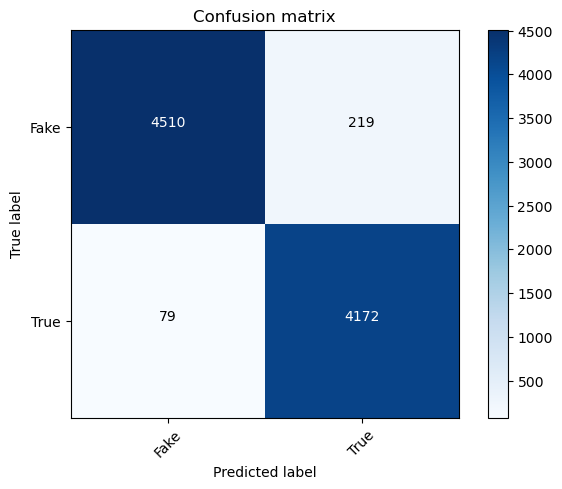

In [39]:
cm1 = metrics.confusion_matrix(y_test, predicted_nbc, labels=['Fake', 'True'])
plot_confusion_matrix(cm1, classes=['Fake', 'True'])

In [40]:
print(cm1)

[[4510  219]
 [  79 4172]]


In [41]:
print(metrics.classification_report(y_test, predicted_nbc))

              precision    recall  f1-score   support

        Fake       0.98      0.95      0.97      4729
        True       0.95      0.98      0.97      4251

    accuracy                           0.97      8980
   macro avg       0.97      0.97      0.97      8980
weighted avg       0.97      0.97      0.97      8980



In [42]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
xv_train = tfidf_vectorizer.fit_transform(x_train)
xv_test = tfidf_vectorizer.transform(x_test)

In [43]:
# get feature names

# Get the feature names of 'tfidf_vectorizer'

print(tfidf_vectorizer.get_feature_names()[-10:])

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['zynga', 'zypries', 'zyries', 'zyuganov', 'zyuseragentifzxzbreak', 'zz', 'zzbluecomet', 'zztaine', 'zzzzaaaacccchhh', 'zzzzzzzzzzzzz']


In [44]:
# building classifier using naive bayes 
# Naive Bayes classifier for Multinomial model

nb_pipeline = Pipeline([
        ('NBTV',tfidf_vectorizer),
        ('nb_clf',MultinomialNB())])

In [45]:
# Fit Naive Bayes classifier according to X, y

nb_pipeline.fit(x_train,y_train)

Pipeline(steps=[('NBTV', TfidfVectorizer(max_df=0.7, stop_words='english')),
                ('nb_clf', MultinomialNB())])

In [46]:
# Perform classification on an array of test vectors X

predicted_nbt = nb_pipeline.predict(x_test)

In [47]:
score = metrics.accuracy_score(y_test, predicted_nbt)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 94.24%


Confusion matrix, without normalization


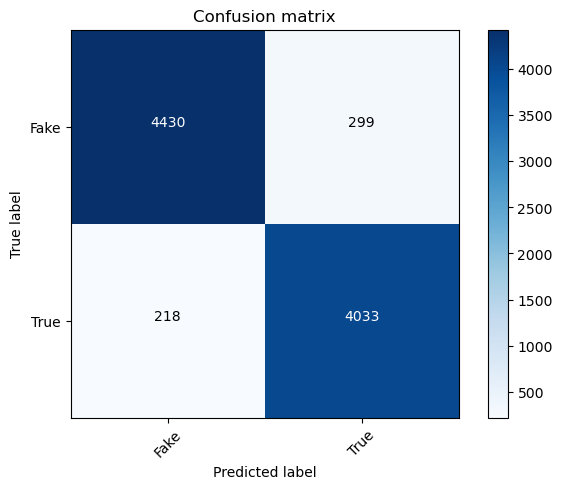

In [48]:
cm = metrics.confusion_matrix(y_test, predicted_nbt, labels=['Fake', 'True'])
plot_confusion_matrix(cm, classes=['Fake', 'True'])

In [49]:
print(cm)

[[4430  299]
 [ 218 4033]]


In [50]:
print(metrics.classification_report(y_test, predicted_nbt))

              precision    recall  f1-score   support

        Fake       0.95      0.94      0.94      4729
        True       0.93      0.95      0.94      4251

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



In [53]:
# saving best model to the disk
import pickle
model_file = 'final_model.pkl'
pickle.dump(nbc_pipeline,open(model_file,'wb'))

In [54]:
model_vector = 'final_vector.pkl'
pickle.dump(count_vectorizer,open(model_vector,'wb'))

In [ ]:

var = input("Please enter the news text you want to verify: ")

# function to run for prediction
def detecting_fake_news(var):  
    
    #retrieving the best model for prediction call
    load_model = pickle.load(open('final_model.sav', 'rb'))
    prediction = load_model.predict([var])

    return (print("The given statement is ",prediction[0]))

if __name__ == '__main__':
    detecting_fake_news(var)